## Online Payments Fraud Detection: Can a machine learning model accurately predict whether a transaction is fraudulent or not?

This is a dataset of bank transactions which have been classified as fraudulent or not.


Kaggle dataset: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

The work is split into 4 notebooks with the main one being this one. The dataset has over 6 million records so it's slowing the analysis and the preprocessing. At the end of this notebook you will see the next options.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from IPython import display

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

## Loading the dataset

In [3]:
## loading data
df = pd.read_csv('fraud_detection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Descriptive Analysis

In [4]:
## shape of the dataset
df.shape

(6362620, 11)

In [5]:
df.info()
## there are 6,362,620 records and 11 columns (10 features + 1 target variable: isFraud)
## 3 categorical variables of which 2 are encoded and remaining 8 numeric variables
## 5 float columns and 3 integer columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


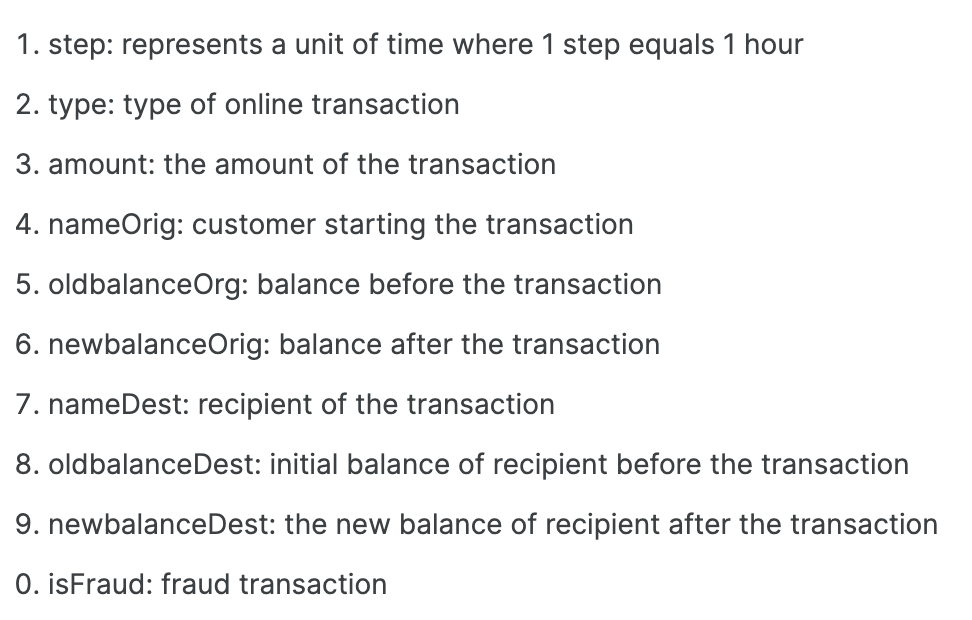

In [6]:
#Description about the dataset's characteristics
display.Image('fd_description_attributes.png',width = 400)

In [7]:
## checking misssing values: no missing values
df.isnull().sum() 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
## statistics of variables
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
## explore unique values for each column
column_names = list(df.columns)
for col in column_names:
    print(col, ':', df[col].nunique(), )

step : 743
type : 5
amount : 5316900
nameOrig : 6353307
oldbalanceOrg : 1845844
newbalanceOrig : 2682586
nameDest : 2722362
oldbalanceDest : 3614697
newbalanceDest : 3555499
isFraud : 2
isFlaggedFraud : 2


In [10]:
df['amount'].max()  ##2445516.64
df['amount'].min()  ##0.0

0.0

In [11]:
## separating variables
num_col=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
cat_col = ['type','nameOrig','nameDest']
encoded_col = ['isFraud','isFlaggedFraud']

<function matplotlib.pyplot.show(close=None, block=None)>

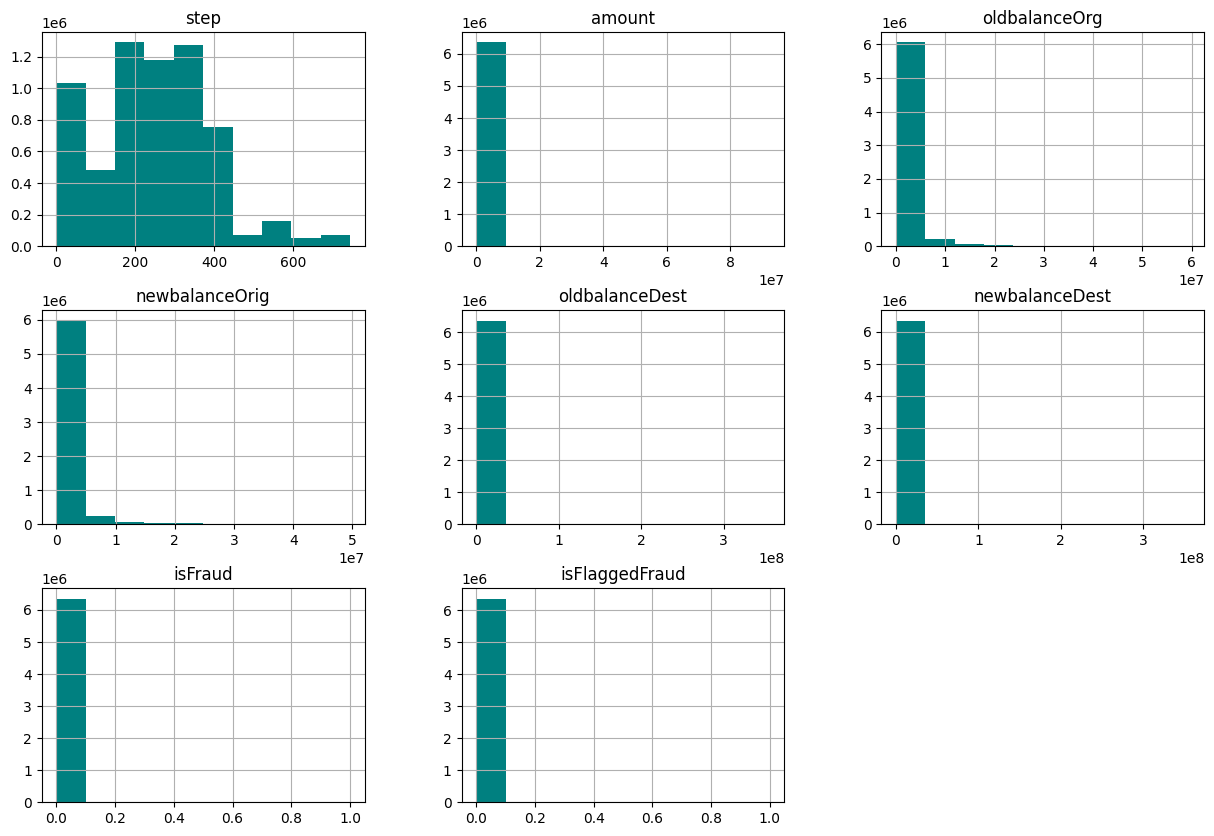

In [12]:
## histogram of each variables
df.hist(bins=10, figsize=(15,10), color='teal')
plt.show

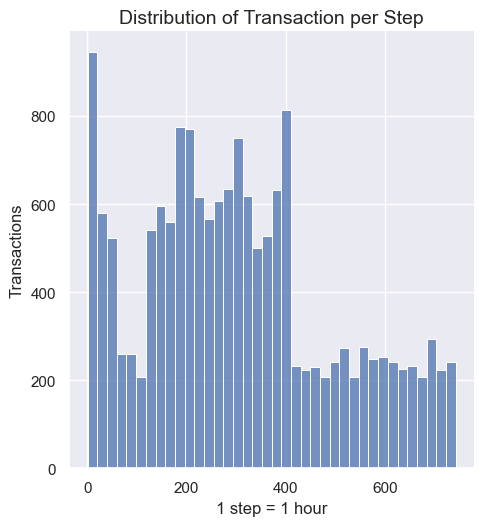

In [41]:
time_val = df['step'].values
ax = sns.displot(time_val, color='b')
plt.title('Distribution of Transaction per Step', fontsize=14)
#ax.set_xlim([min(time_val), max(time_val)])
plt.xlabel( '1 step = 1 hour')
plt.ylabel( 'Transactions')
plt.show()

## Analysis of frauds 

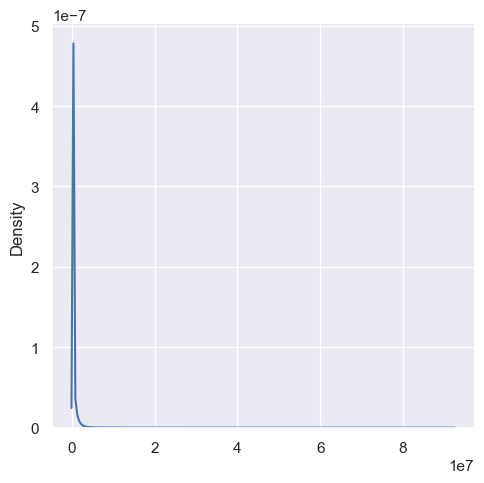

In [15]:
## subset of df with only transactions that are fraud
df_fraud = df[df['isFraud']==1]
sns.set(style="darkgrid")
sns.displot(df, x=df["amount"].values, kind="kde")



/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_89482/163800567.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x/1e6}' for x in vals])


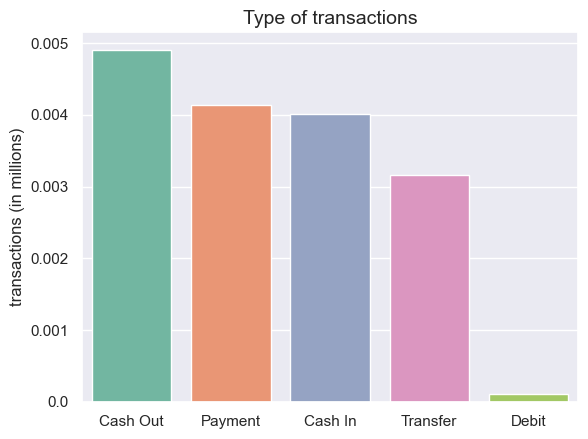

In [42]:
## Countplot of number of transactions per type 

ax = sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette = 'Set2')
ax.set_xticklabels(['Cash Out','Payment','Cash In','Transfer', 'Debit'])
vals = ax.get_yticks()
ax.set_yticklabels([f'{x/1e6}' for x in vals])
ax.set_ylabel('transactions (in millions)')
ax.set_xlabel(None)
plt.title('Type of transactions', fontsize=14)
plt.show()

In [18]:
## dataframe of count of flaggedfraud that are actualy fraud or not 

df_sub_fraud = df.groupby(['isFlaggedFraud',"isFraud"]).size().reset_index(name="Count")
df_sub_fraud['Percentage'] = round(df_sub_fraud['Count'] *100/ len(df),2)
df_sub_fraud

,isFlaggedFraud,isFraud,Count,Percentage
0,0,0,6354407,99.87
1,0,1,8197,0.13
2,1,1,16,0.00


/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_89482/3973501725.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  fraud_ax.set_yticklabels([f'{int(x/1e6)}' for x in fraud_vals])


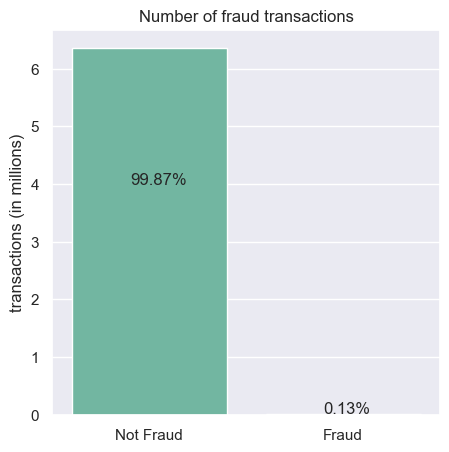

In [19]:
##Barplot of number of fraud transactions
## can see huge imbalance of dataset

## selecting the percentage value to put in the barplot 
non_fraud_value = df_sub_fraud.iloc[0]['Percentage']
fraud_value = df_sub_fraud.iloc[1]['Percentage']

plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
fraud_ax = sns.countplot(data=df,x='isFraud',palette = 'Set2')
fraud_ax.set_title('Number of fraud transactions')
fraud_ax.set( xlabel= None, ylabel= None)
fraud_vals = fraud_ax.get_yticks()
fraud_ax.set_yticklabels([f'{int(x/1e6)}' for x in fraud_vals])
fraud_ax.set_ylabel('transactions (in millions)')
fraud_ax.set_xticklabels(['Not Fraud', 'Fraud'])
plt.text(y= 4*1e6, x=-0.1, s=f'{non_fraud_value}%')
plt.text(y=3*1e4, x=0.9, s=f'{fraud_value}%')


plt.show()

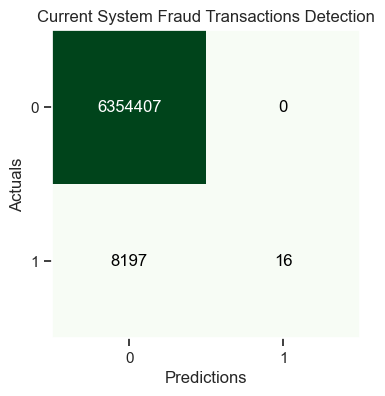

In [20]:
## confusion matrix of how well the current system detects fraud
## the system is not good at detecting fraud with false negatives at 8197 which means those were undetected fraud transactions 

conf_mat = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])
fig, ax = plot_confusion_matrix(conf_mat = conf_mat , figsize = (4,4), cmap = 'Greens')
plt.xlabel('Predictions', fontsize = 12 )
plt.ylabel('Actuals', fontsize = 12 )
plt.title('Current System Fraud Transactions Detection', fontsize = 12 )
plt.show()

## Correlation Matrix
To check the relationship between independent variables and target variable 'isFraud'

The highest correlated variable is 'amount' at 0.077. 
All the correlation numbers are low which means that there are no correlations/linear relationship between independent variables and the target variable.

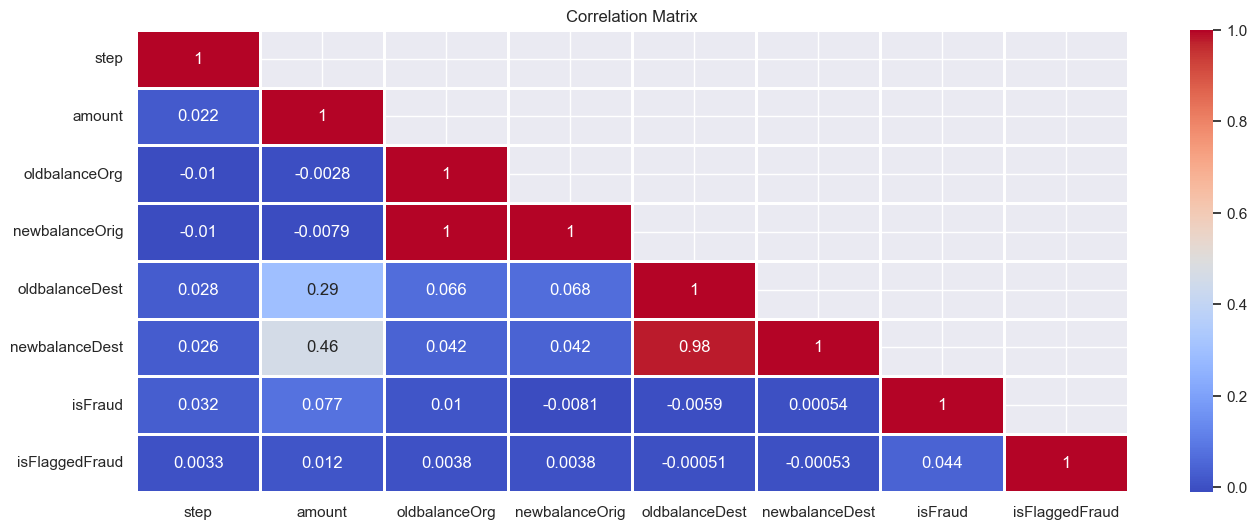

In [21]:
## check for correlation
corr_mat = df.corr(numeric_only=True)
corr_mat

plt.figure(figsize=(16,6))
mask = np.triu(corr_mat,k=1)
sns.heatmap(corr_mat, annot=True, linewidths=1, mask=mask, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## oldbalanceDest and newbalanceDest has a correlation with amount, although a small one

## Understanding the mismatch of records

The dataset has numbers that don't correspond. 
The amount of transaction does not match to the difference between the before and after balance. 

Here i tried to understand whether it takes longer for the recipient to receive the amount or be deducted. Therefore in the same row,
there might 2 transactions going on within one step which is one hour. 

For example, row 1 (index 0) has a payment amount of $9839.64 but the recipient on the same row has the same before&after balance of $0.

In [22]:
## reminder
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
## subset of df where all transactions are in step 1 (first hour of data recorded)
df_step1 = df[df['step']==1]
df_step1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2703,1,CASH_IN,43478.09,C1156135967,7471989.62,7515467.71,C2117043942,124103.0,173135.98,0,0
2704,1,PAYMENT,4541.85,C1110913929,198.00,0.00,M162667475,0.0,0.00,0,0
2705,1,PAYMENT,525.89,C174245837,8496.61,7970.72,M124132186,0.0,0.00,0,0
2706,1,PAYMENT,353.62,C2083969860,7970.72,7617.10,M1707293586,0.0,0.00,0,0


In [24]:
## using random transaction at index 2703
## does the recipient's transaction in relation to the sender's transaction on the same row? no it's not, the difference is $
# 49032.98 but the amount is 43478.09
df_step1.iloc[2703]["newbalanceDest"] - df_step1.iloc[2703]["oldbalanceDest"] #$  173135.98	-$124103.0 = $49032.98000000001


## round the difference to 49032.98
## does this amount anywhere transacted by a sender within the first step ( one hour)? No
49032.98 in df_step1["amount"].unique() #False

## Nor in the whole dataset 
49032.98 in df["amount"].unique()

## So there are rows with mismatches between sender and recipient's records


False

In [25]:
## exploring the type of transaction: payment

df_pay = df[df["type"]=='PAYMENT'] #2151495 rows × 11 columns
df_pay[df_pay['amount']>0] ## no amount of payment of $0
df_pay['amount'].min()  ## min amount of payment is $0.02

# records where the payment amount is not equal to the different in the before and after payment transsaction
## first row of df_pay (index 8 of df): there's a payment of $4024.36 but before the payment their bank account has $2671.00 which is less and 
## after the payment has a new balance of 0.0 -> does not make sense -> to be removed 
df_pay[round(df_pay['oldbalanceOrg'] - df_pay['newbalanceOrig'],2) !=  df_pay['amount']] #1205652 rows × 11 columns

## there is not data where the balance of the recipient who has received the payment has changed, so these columns are to be dropped
df_pay[df_pay['oldbalanceDest'] != 0.0]
len(df_pay[df_pay["oldbalanceDest"]!=df_pay["newbalanceDest"]])

## number of customers who have made payment: there is only one customer C363736674 who has done the maximum of 3 payments in this data
df_pay['nameOrig'].value_counts()

df_pay
## confirms that there's a mismatch in records again

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


## Subsetting 1: Removing the mismatched records of the sender

Following the above, I am removing the mismatched records

Saved to fraud2_after_subset.csv

In [26]:
## Getting correct subset of data according to their type because I have to calculate whether the amount added or deducted corresponds
#to the difference of before & after balance 

'''
Reminder - Original Dataset: Number of transactions per type of transaction 
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
'''

#All the records for each type of transactions that have a correct balance after the transaction made

#####
# money going out : payment, cash-out, debit and transfer (balance will be reduced)

## payment amount is equal to the difference in the sender before and after account balance
## however the recipients are 0.0 so will have to dropped. I won't drop as there will be less features to work with first.
df_pay = df[df["type"]=='PAYMENT']
df_pay1 = df_pay[round(df_pay['oldbalanceOrg'] - df_pay['newbalanceOrig'],2) ==  df_pay['amount']] #945843 rows × 11 columns

#cash_out subset
df_cash_out = df[df["type"]=='CASH_OUT']
df_cash_out1 = df_cash_out[round(df_cash_out['oldbalanceOrg'] - df_cash_out['newbalanceOrig'],2) ==  df_cash_out['amount']] #239407 rows × 11 columns

#debit subset
df_debit = df[df["type"]=='DEBIT']
df_debit1 = df_debit[round(df_debit['oldbalanceOrg'] - df_debit['newbalanceOrig'],2) ==  df_debit['amount']] #28537 rows × 11 columns

#transfer subset
df_transfer = df[df["type"]=='TRANSFER']
df_transfer1 = df_transfer[round(df_transfer['oldbalanceOrg'] - df_transfer['newbalanceOrig'],2) ==  df_transfer['amount']] #23281 rows × 11 columns

#####money coming in : cash-in subset (balance will be increased)
df_cash_in = df[df["type"]=='CASH_IN']
df_cash_in1 = df_cash_in[round(df_cash_in['newbalanceOrig'] - df_cash_in['oldbalanceOrg'],2) ==  df_cash_in['amount']] #1186107 rows × 11 columns

##new dataset has 945843 + 239407 + 28537 + 23281 + 1186107 = 2423175 records with correct balance after transactions that make sense

In [27]:
## concatenate all the 5 subsets, assign to df to replace the original datset 
df = pd.concat([df_pay1,df_cash_out1,df_debit1, df_transfer1, df_cash_in1]).reset_index(drop=True)
df #subset df has now 2423175 rows × 11 columns

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2423170,718,CASH_IN,188888.89,C1459052107,51838.0,240726.89,C1955750585,0.00,0.00,0,0
2423171,718,CASH_IN,27919.60,C562982749,2413.0,30332.60,C240654881,512791.59,484871.98,0,0
2423172,718,CASH_IN,78988.38,C886862695,204464.0,283452.38,C262804200,108724.19,29735.81,0,0
2423173,718,CASH_IN,18000.26,C50108853,63409.0,81409.26,C204102272,28088.61,10088.34,0,0


In [ ]:
## saved to csv to be re-used if needed
df.to_csv('fraud2_after_subset.csv', index= False)


In [28]:
## Dataframe summarising difference in records number
## number of rows for each type before and after removing them
proportion= {'Type': ['Cash Out','Payment','Debit','Transfer','Cash In','TOTAL'],'Original dataset' : [2237500,2151495,41432,532909,1399284,6362620], 'New dataset' : [239407,945843,28537,23281,1186107,2423175]}
proportion = pd.DataFrame(proportion, index = range(6)).sort_values('Original dataset', ascending = False)
proportion['Percentage of new dataset'] = round(proportion['New dataset'] *100/ proportion['Original dataset'],1)

proportion

,Type,Original dataset,New dataset,Percentage of new dataset
5,TOTAL,6362620,2423175,38.1
0,Cash Out,2237500,239407,10.7
1,Payment,2151495,945843,44.0
4,Cash In,1399284,1186107,84.8
3,Transfer,532909,23281,4.4
2,Debit,41432,28537,68.9


In [29]:
## find out how many fraud and non fraud rows in new datset
df[df['isFraud']== 1]
df.shape # 8168 rows × 11 column
df['isFlaggedFraud'].value_counts()  #no rows are flagged fraud
df['isFraud'].value_counts() #0    2415007 ; 1       8168

##There was an imbalance in the original data with 0.13% (8197) being fraud only.
##From the new dataset, there is still the majority of fraud rows 8168 which means we are not missing a lot of these important data.

isFraud
0    2415007
1       8168
Name: count, dtype: int64

In [30]:
## type of transactions isFraud in new dataset: cash_out and transfer 
df_fraud= df[df['isFraud']== 1]
df_fraud['type'].value_counts()

type
CASH_OUT    4092
TRANSFER    4076
Name: count, dtype: int64

## Subsetting 2: balancing the dataset with undersampling 

The dataset still has over 99% is not fraud data which is unbalanced. So I will use undersampling to randomly select 8168 records from is not fraud
to match the same number of isFraud records.

Saved as fraud3_after_balancing.csv

In [31]:
## summary number of records
summary= {'Type': ['TOTAL','isFraud','% isFraud'],'Original dataset' : [6362620,8197, 0.13], 'New dataset' : [2423175,8168,0.34]}
summary = pd.DataFrame(summary, index = range(3)).sort_values('Original dataset', ascending = False)
summary['Percentage of new dataset'] = round(summary['New dataset'] *100/ summary['Original dataset'],1)
summary

,Type,Original dataset,New dataset,Percentage of new dataset
0,TOTAL,6362620.00,2423175.00,38.1
1,isFraud,8197.00,8168.00,99.6
2,% isFraud,0.13,0.34,261.5


In [32]:
## subset of random 8168 records that are not isFraud
df_notfraud = df[df['isFraud']!= 1].sample(8168,random_state=123)

## subset of 8168 records that isFraud
df_fraud = df[df['isFraud']== 1]
df_fraud.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
945843,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
945845,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
945848,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
945851,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
945853,1,CASH_OUT,35063.63,C1635772897,35063.63,0.0,C1983025922,31140.0,7550.03,1,0


In [33]:
## concatenate and replace the previous dataset
df = pd.concat([df_notfraud,df_fraud]).reset_index(drop=True)

df.shape #(16336, 11)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,354,CASH_IN,260012.02,C544176471,5199053.93,5459065.95,C321290795,755473.56,495461.54,0,0
1,155,CASH_OUT,43098.67,C1761157771,85975.00,42876.33,C394115025,0.00,43098.67,0,0
2,129,CASH_IN,271158.11,C1672086699,6481157.15,6752315.26,C1921731690,17747883.77,17476725.66,0,0
3,466,CASH_OUT,88781.48,C846693684,158051.00,69269.52,C932961272,0.00,88781.48,0,0
4,19,PAYMENT,20873.25,C1919075712,164045.26,143172.01,M617611303,0.00,0.00,0,0


In [ ]:
## saved to csv to be re-used if needed
df.to_csv('fraud3_after_balancing.csv', index= False)


## Next 

 <br> 

I have splitted the notebook as it would be too heavy with the inital analysis then the different models I can explore on the 3 datasets:

-the original dataset:          go to test.ipynd

-the data2 fraud2_after_subset:       go to test2.ipynd

-the data3 fraud3_after_balancing:    go to test3.ipynd



 <br> 

You can go in that order. If not, skip to test3.ipynd

The original data has about 6 million records so it took a while to load and analyse.

